# Mortar Learning Data Architecture

* Data Collection
* Data Storage
* Data Transformation
* Data Flow
* Data Security

### Architecture: Event-Driven

Website generates events that trigger subsequent actions.

### Data Models

#### Event Model

Data model for user events generated by users. Attributes include ID, timestamp, event type, event specific data. This is a general event model which could include page views, logins, donations, creating a class, or other user actions.

#### Credit Model

Model assigns scores to specific event types generated by users or combination of other data. This would use a segment of the data with the event model.

---
## Data Model Implementation

This example uses a file of JSON objects as input and aggregates the events into another file containing a single JSON object. These events may be produced by the website or through an API and stored on a server or in cloud storage. The process can run on the backend in the application server as an event consumer or as a batch ETL process.  The file contains JSON objects

### Event Object

```

{
  "user_id": "1", // User who performed the action
  "action": "teach_lesson", // Action performed (signup, teach_lesson, etc.)
  "timestamp": 1678736400
}
```

#### events.log
This is consumed by the python process. The events can be collected through an API endpoint or created by the webserver as other events come in. May be saved on the server or in the cloud.



#### user_actions.json
This is created by the process. This is can be sent to a database, or saved in the cloud, or sent to another process.

In [2]:
import json
import matplotlib.pyplot as plt


def save_user_actions_to_json(user_actions, filename):
    """Saves the user actions dictionary as a JSON file."""
    with open(filename, "w") as f:
        json.dump(user_actions, f, indent=4)



with open("data/events.log", "r") as f:
    # Create a dictionary to store user ID and action counts
    user_actions = {}
    for line in f:
        #TODO Assuming each line contains a single JSON object, doesn't work for empty lines, fix later
        data = json.loads(line.strip())
        user_id = data["userID"]
        action = data["action"]
        # Check if user ID is in the dictionary
        if user_id not in user_actions:
            # Create a new entry with initial count of 0 for the first action
            user_actions[user_id] = {action: 1}
        else:
            # If the action already exists, increment its count
            if action in user_actions[user_id]:
                user_actions[user_id][action] += 1
            else:
                # If the action is new, add it with a count of 1
                user_actions[user_id][action] = 1
    print(user_actions)

# Print user ID and action counts
for user_id, actions in user_actions.items():
    print(f"User ID: {user_id}")
    for action, count in actions.items():
        print(f"\tAction: {action}, Count: {count}")
save_user_actions_to_json(user_actions, "data/user_actions.json")





{1: {'login': 1, 'create_class': 1, 'teach_lesson': 7, 'give_homework': 1}, 2: {'login': 1, 'teach_lesson': 5, 'give_homework': 5}, 3: {'login': 1, 'teach_lesson': 1, 'record_lesson': 1, 'create_content': 2, 'post': 3, 'confirm_student_tasks': 1}}
User ID: 1
	Action: login, Count: 1
	Action: create_class, Count: 1
	Action: teach_lesson, Count: 7
	Action: give_homework, Count: 1
User ID: 2
	Action: login, Count: 1
	Action: teach_lesson, Count: 5
	Action: give_homework, Count: 5
User ID: 3
	Action: login, Count: 1
	Action: teach_lesson, Count: 1
	Action: record_lesson, Count: 1
	Action: create_content, Count: 2
	Action: post, Count: 3
	Action: confirm_student_tasks, Count: 1


### Analytics

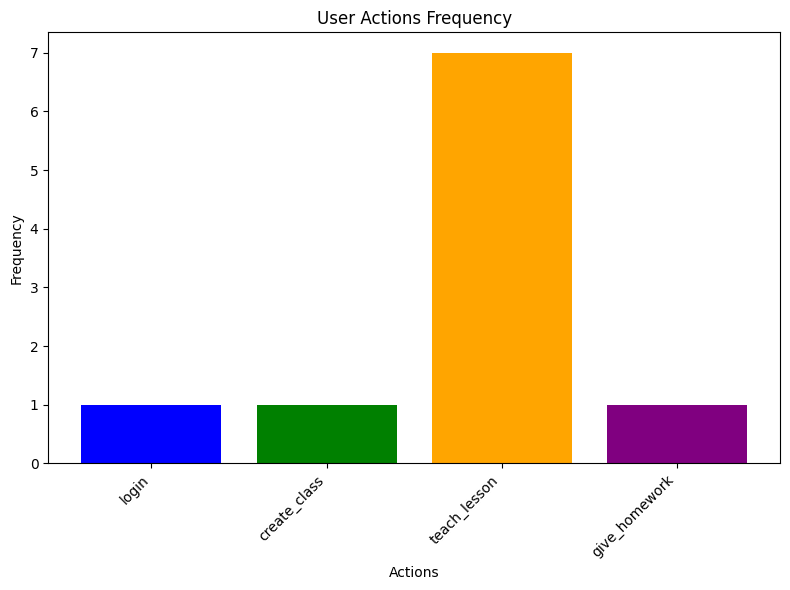

Bad pipe message: %s [b'svg+xml,image/*,*/*;q=0.8\r\nHost: localhost:46335\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x', b') AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0']
Bad pipe message: %s [b'.0 Safari/537.36\r\nAccept-Encoding: gzip, defl']
Bad pipe message: %s [b'e, br, zstd\r\nAccept-Language: en-US,en;q=0.9\r\nX-Forwarded-For: 10.240.0.199\r\nReferer: https://fu']
Bad pipe message: %s [b'y-space-xylophone-jj55xjr6rrgw3j55x-46335.app.github.dev/\r\nX-Request-ID: 649d011483bff4042ae2b71249412072\r\nX-Real-IP: 10.']
Bad pipe message: %s [b'0.0.199\r\nX-Forwarded-Proto: https\r\nX-Forwarded-Ho']
Bad pipe message: %s [b': fuzzy-space-xylophone-jj55xjr6rrgw3j55x-46335.app.github.dev\r\nX-Forwarded-Port: 443\r\nX-Forwarded-Scheme: https\r\n']
Bad pipe message: %s [b'Original-URI: /favicon.ico\r\nX-Scheme: https\r\nsec-ch-ua: "Chromium";v="122", "Not(A:Bran', b';v="24", "Google Chrome";v="122"\r\nsec-ch-ua-mobile: ?0\r\nsec-ch-ua-platform: "Windows"\r\nsec-fetch-si']
B

In [1]:
import matplotlib.pyplot as plt

# Define the data
data = {'login': 1, 'create_class': 1, 'teach_lesson': 7, 'give_homework': 1}

# Extract labels and data values
labels = list(data.keys())
data_values = list(data.values())

# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
plt.bar(labels, data_values, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Actions')
plt.ylabel('Frequency')
plt.title('User Actions Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the bar chart
plt.tight_layout()
plt.show()
